<a href="https://colab.research.google.com/github/bandreibal/03MIAR---Algoritmos-de-Optimizacion---2023/blob/main/RETOS/Retos_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Retos
Nombre y Apellidos: Bogdan Andrei Baltes

Github: https://github.com/bandreibal/03MIAR---Algoritmos-de-Optimizacion---2023/tree/main/RETOS

Colab: https://colab.research.google.com/drive/1SPddn9QcU2td3-hLp-RuL9tqlKLZRRHR?usp=sharing

Retos propuestos de las diversas técnicas estudiadas. Los retos resueltos son los siguientes:

- **Implementar el algoritmo de la Criba de Erastótenes para encontrar número primos**
- **Resolver el problema de las 8-Reinas.**
- **Resolver el problema de las Torres de Hanoi para un número arbitrario de fichas.**
- **Optimización de la función f(x)=sin(1/2∗x2−1/4∗y2+3)∗cos(2∗x+1−ey) mediante el algoritmo por descenso del gradiente.**
- **Implementar el algoritmo del descenso por gradiente para el problema de la regresión lineal simple.**



                                        

# Implementar el algoritmo de la Criba de Erastótenes para encontrar número primos

In [22]:
import math

def criba_erastotenes(n):
    candidatos = [p for p in range(2, n+1)]

    for p in range(2, math.floor(math.sqrt(n))+1):
        candidatos = [x for x in candidatos if (x%p != 0 and x!=p) or x <= p]

    return candidatos

criba_erastotenes(30)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

# Resolver el problema de las 8-Reinas.

In [2]:
def reinas(N, tablero=[]):
    if len(tablero) == 0:
        tablero = [[0 for x in range(N)] for y in range(N)]

    def imprimir_tablero(board):
        for row in board:
            for cell in row:
                if cell == 1:
                    print('Q', end=' ')
                else:
                    print('.', end=' ')
            print()

    def comprobar_reinas(tablero, col):
        if col == N:
            print("Solución encontrada:")
            imprimir_tablero(tablero)
            return True
        for i in range(N):
            if sin_amenazas(tablero, i, col):
                tablero[i][col] = 1
                if comprobar_reinas(tablero, col + 1):
                    return True
                tablero[i][col] = 0
        return False

    def sin_amenazas(tablero, fila, col):
        # Se comprueba la fila
        if sum(tablero[fila]) > 0:
            return False

        # Se comprueba la columna
        columna = [tablero[x][col] for x in range(len(tablero))]
        if sum(columna) > 0:
            return False

        # Se comprueban las diagonales
        for x, y in zip(range(fila, -1, -1), range(col, -1, -1)):
            if tablero[x][y] == 1:
                return False

        return True

    comprobar_reinas(tablero, 0)

Ejecutamos un ejemplo, con $N = 5$.

In [3]:
reinas(5)

Solución encontrada:
Q . . . . 
. . . Q . 
. Q . . . 
. . . . Q 
. . Q . . 


# Resolver el problema de las Torres de Hanoi para un número arbitrario de fichas

In [4]:
def hanoi(n, A, B, C):
    """
    Función recursiva para resolver el problema de las Torres de Hanoi para un
    número arbitrario de fichas.

    Parameters:
    n (int): Número de fichas para el que se debe resolver el problema.
    A (str): Posición donde se encuentra la torre que hay que resolver.
    B (str): Posición pivote.
    C (str): Posición destino
    """
    if n>0:
        hanoi(n-1, A, C, B)
        print(f"Se mueve la ficha de {A} a {C}")
        hanoi(n-1, B, A, C)

hanoi(3, 1, 2, 3)

Se mueve la ficha de 1 a 3
Se mueve la ficha de 1 a 2
Se mueve la ficha de 3 a 2
Se mueve la ficha de 1 a 3
Se mueve la ficha de 2 a 1
Se mueve la ficha de 2 a 3
Se mueve la ficha de 1 a 3


# Optimización de la función $f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$ mediante el algoritmo por descenso del gradiente.

Para abordar este reto, he seguido dos enfoques:


1.   Calcular el gradiente de la función y usar el mismo método de antes.
2.   Calcular el gradiente con las derivadas de segundo orden para utilizar el Método de Newton.



## Método 1
Conseguimos encontrar soluciones cercanas al mínimo (-1) aumentando el número de iteraciones a 100.

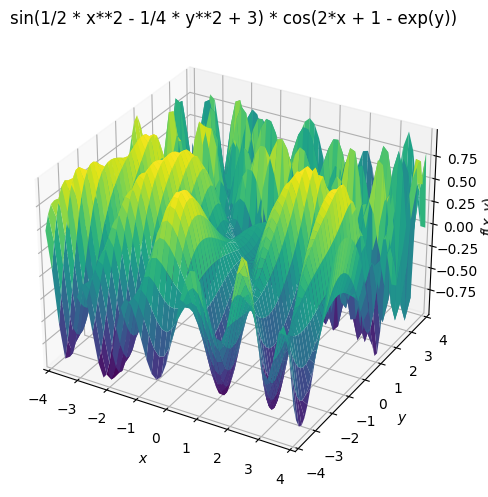

In [16]:
from sympy import cos, sin, exp, symbols
from sympy.plotting import plot, plot3d
import numpy as np
import math
import matplotlib.pyplot as plt
import random

#Definimos la funcion
f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]) )
df = lambda X: [ X[0] * math.cos(2*X[0] - math.exp(X[1]) + 1) * math.cos(X[0]**2 / 2 - X[1]**2 / 4 + 3) - 2*math.sin(2*X[0] - math.exp(X[1]) + 1) * math.sin(X[0]**2/2 - X[1]**2/4 + 3) ,
                 math.exp(X[1]) * math.sin(2*X[0] - math.exp(X[1]) + 1) * math.sin(X[0]**2 / 2 - X[1]**2 / 4 + 3) - 1/2 * X[1] * math.cos(2*X[0] - math.exp(X[1]) + 1) * math.cos(X[0]**2 / 2 - X[1]**2 / 4 + 3)]         #Gradiente

x,y = symbols('x y')
plot3d(sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2*x + 1 - exp(y)),
       (x,-4,4),(y,-4,4),
       title='sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2*x + 1 - exp(y))',
       size=(5,5))

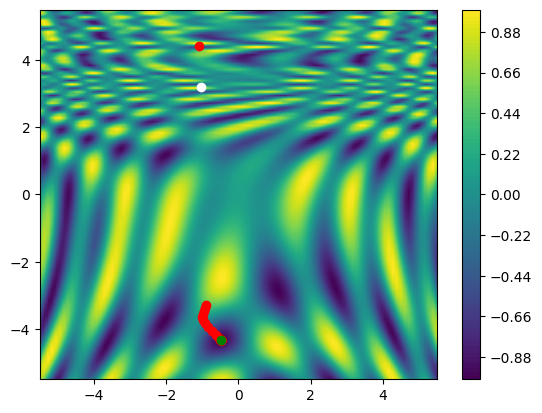

Solucion: [-0.4934323468126579, -4.332451531055099] -1.0


In [21]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-4,4  ), random.uniform(-4,4 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=0.1

#Iteraciones:100
for _ in range(100):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

## Método 2
Conseguimos un buen funcionamiento en algunos casos, aunque no en todos para esta función.

Ha sido interesante también comprobar el funcionamiento de este método para la función anterior, y el resultado sí fue muy bueno con esa función.

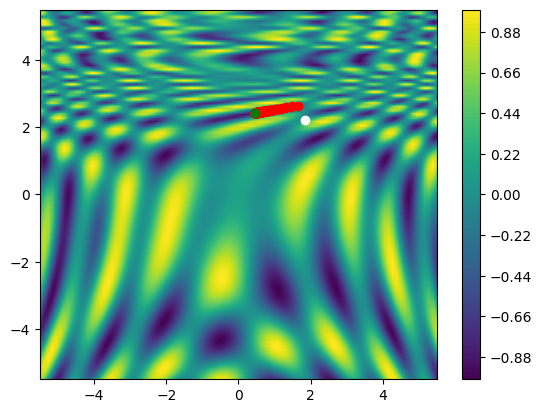

Solucion: [0.45637148246110754, 2.429093504467341] -0.9982446926608082


In [7]:
#Definimos la funcion
f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]) )
df = lambda X: [ X[0] * math.cos(2*X[0] - math.exp(X[1]) + 1) * math.cos(X[0]**2 / 2 - X[1]**2 / 4 + 3) - 2*math.sin(2*X[0] - math.exp(X[1]) + 1) * math.sin(X[0]**2/2 - X[1]**2/4 + 3) ,
                 math.exp(X[1]) * math.sin(2*X[0] - math.exp(X[1]) + 1) * math.sin(X[0]**2 / 2 - X[1]**2 / 4 + 3) - 1/2 * X[1] * math.cos(2*X[0] - math.exp(X[1]) + 1) * math.cos(X[0]**2 / 2 - X[1]**2 / 4 + 3)]         #Gradiente
df2 = lambda X: [ math.cos(2*X[0] - math.exp(X[1]) + 1) * (math.cos(X[0]**2/2 - X[1]**2/4 + 3) - (X[0]**2 + 4) * math.sin(X[0]**2/2 - X[1]**2/4 + 3)) - 4*X[0] * math.sin(2*X[0] - math.exp(X[1]) + 1)*math.cos(X[0]**2/2 - X[1]**2/4 + 3) ,
                  - math.exp(X[1]) * math.sin(2*X[0] - math.exp(X[1]) + 1) * (X[1]* math.cos(X[0]**2/2 - X[1]**2/4 + 3) - math.sin(X[0]**2/2 - X[1]**2/4 + 3)) - 1/4 * math.cos(2*X[0] - math.exp(X[1]) + 1) * ((X[1]**2 + 4*math.exp(2*X[1])) * math.sin(X[0]**2/2 - X[1]**2/4 + 3) + 2*math.cos(X[0]**2/2-X[1]**2/4 +3))
]

#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-4,4  ), random.uniform(-4,4 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=0.1

#Iteraciones:100
for _ in range(100):
  grad = df(P)
  grad2 = df2(P)
  #print(P,grad)
  #P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  P[0],P[1] = P[0] - grad[0]/grad2[0] , P[1] - grad[1]/grad2[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

Volvemos a definir la función paraboloide : $$f(x) =  x² + y²$$

En comparación con el funcionamiento del método original, que a veces (dependiendo de la inicialización) no encuentra la solución óptima $f(x) = 0$ después de 50 iteraciones, mediante el Método de Newton se encuentra después de tan solo una iteración.

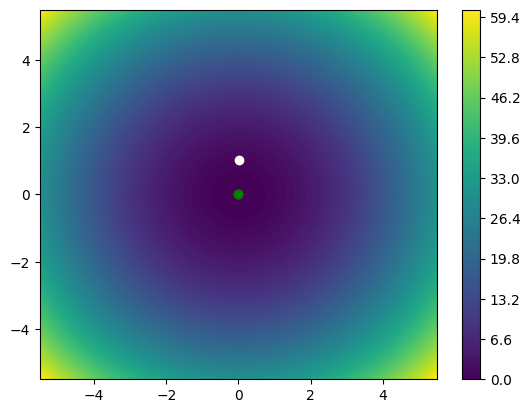

Solucion: [0.0, 0.0] 0.0


In [8]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente
df2 = lambda X: [2, 2]

df([1,2])

#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-4,4  ), random.uniform(-4,4 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=0.1

#Iteraciones:1
for _ in range(1):
  grad = df(P)
  grad2 = df2(P)
  #print(P,grad)
  #P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  P[0],P[1] = P[0] - grad[0]/grad2[0] , P[1] - grad[1]/grad2[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

# Implementar el algoritmo del descenso por gradiente para el problema de la regresión lineal simple.

La regresión lineal simple se define como $$ Y = mX + c$$

$m$ y $c$ son parámetros constantes para todo $X$ e $Y$, y representan la pendiente de la recta y la ordenada en el origen, respectivamente.

Pendiente: 2.2661244578442825
Ordenada en el origen: 2.353790072804528


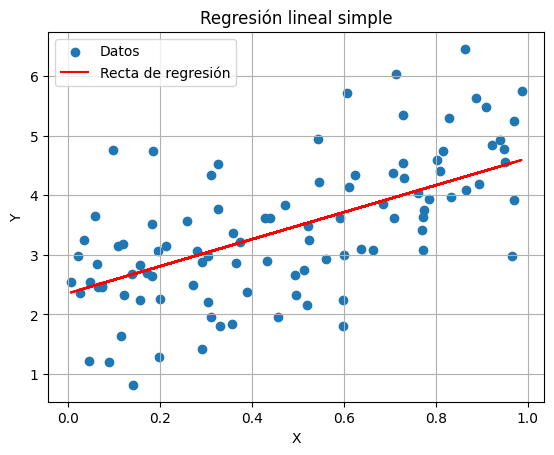

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(X, Y, learning_rate=0.01, epochs=1000):
    n = len(X)
    m, c = 0, 0

    for _ in range(epochs):
        Y_pred = m * X + c
        error = Y_pred - Y

        # Se calculan los gradientes y se actualizan los valores
        gradient_m, gradient_c = (2/n) * np.sum(error * X), (2/n) * np.sum(error)
        m -= learning_rate * gradient_m
        c -= learning_rate * gradient_c

    return m, c

np.random.seed(42)
x_data = np.random.rand(100)
y_data = 3 * x_data + 2 + np.random.randn(100)

m, c = gradient_descent(X=x_data, Y=y_data)

print("Pendiente:", m)
print("Ordenada en el origen:", c)

plt.scatter(x_data, y_data, label='Datos')
plt.plot(x_data, m * x_data + c, color='red', label='Recta de regresión')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión lineal simple')
plt.legend()
plt.grid(True)
plt.show()